In [12]:
from matplotlib import pyplot as plt
import numpy as np 
from os.path import join, abspath
from hammer import no 
from time import time
import pandas as pd
root_dir = abspath(join('..', '..'))
import sys
sys.path.append(root_dir)
import vaex
from scipy.stats import norm
from utils import style, concat

In [3]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [6]:
style('seaborn-bright')

In [7]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir 

'/home2/s20321005/Thesis-Project/Data'

In [8]:
name = "Baryon"
baryon_dir = join(root_data_dir, name)
baryon_dir

'/home2/s20321005/Thesis-Project/Data/Baryon'

In [9]:
# load baryons components
df_baryon = vaex.open(join(baryon_dir, "baryon.hdf5"))
df_baryon

#,components,rho,e_rho,sigma_z,e_sigma_z
0,Molecular gas (H2),0.0104,0.00312,3.7,0.2
1,Cold atomic gas (HI(1)),0.0277,0.00554,7.1,0.5
2,Warm atomic gas (HI(2)),0.0073,0.0007,22.1,2.4
3,Hot ionized gas (HII),0.0005,3e-05,39.0,4.0
4,Giant stars,0.0006,6e-05,15.5,1.6
...,...,...,...,...,...
7,4 < MV < 5,0.0029,0.00029,18.0,1.8
8,5 < MV < 8,0.0072,0.00072,18.5,1.9
9,MV > 8,0.0216,0.0028,18.5,4.0
10,White dwarfs,0.0056,0.001,20.0,5.0


In [15]:
rhob = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s
# normalisation of vertical density profile
log_nu0 = 0
# the rotation curve term
R = 3.4E-3
# the solar offset
zsun = 30
theta = concat(rhob, sigmaz, log_nu0, R, zsun)

w0 = -7.
sigma1 = 10.
sigma2 = 15.
log_sigmaw1 = np.log(sigma1)
log_sigmaw2 = np.log(sigma2)

a1 = 1.
a2 = 0.2
log_a1 = np.log(a1)
log_a2 = np.log(a2)
psi = concat(w0, log_sigmaw1, log_sigmaw2, log_a1, log_a2)

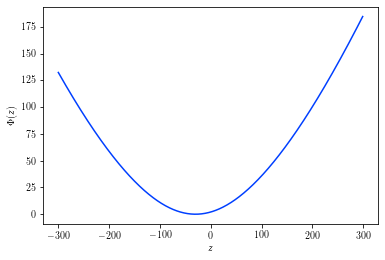

In [13]:
z_start = -300
z_end = 300
dz = 1.

z = np.arange(z_start, z_end, dz)

phi = no.potential(z, theta, dz)

plt.figure(figsize=(6, 4))
plt.plot(z, phi)
plt.xlabel(r'$z$')
plt.ylabel(r'$\Phi(z)$')
plt.show()


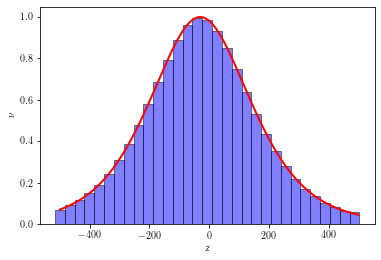

In [16]:
z = np.linspace(-500, 500, 305)
dz = z[10] - z[0]
fz = no.fz(z[::10], theta, psi, dz)
fz_smooth = no.fz(z, theta, psi, dz/10)
plt.figure(figsize=(6, 4))
plt.bar(z[::10], fz, width=dz, color='b', alpha=0.5, ec="k")
plt.plot(z, fz_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.show()

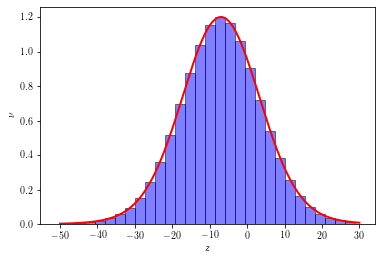

In [17]:
w = np.linspace(-50, 30, 300)
dw = w[10] - w[0]
fw = no.fw(w[::10], theta, psi, dz)
fw_smooth = no.fw(w, theta, psi, dz)
plt.figure(figsize=(6, 4))
plt.bar(w[::10], fw, width=dw, color='b', alpha=0.5, ec="k")
plt.plot(w, fw_smooth, color='r', lw=2)
plt.xlabel(r'$z$')
plt.ylabel(r'$\nu$')
plt.show()